### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [31]:
# Name: Aryan Singhal

There are 3 parts to this lab:
- Part 1 is to read in, analyze, and prepare data for machine learning.
- Parts 2 and 3 each solves a different type of ML problem.<br>
Make sure you read the problem description carefully for parts 2 and 3 so that you can apply the correct ML models.

The input file is `obesity_data.xlsx` ([source](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data?select=ObesityDataSet.csv)), which contains data that are collected from user online responses. The dataset has users' attributes such as age, gender, height, weight, eating habits, daily habits, and obesity level.

In [32]:
# import files here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Part 1: Prepare and analyze data

1. __Read data from `obesity_data.xlsx`__ into a DataFrame.<br>
Then __print the DataFrame__.<br>
Make sure to use the graphical print for all DataFrames.

In [33]:
# Load the dataset
file_path = 'obesity_data.xlsx'
df = pd.read_excel(file_path)

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


2. Change the column labels so they are more readable and easier to user.

According to the source website, the attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH2O), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

Do the following steps to change the column labels:
- __Change the abbreviations__ (in the same order listed in the paragraph above) __to be more descriptive and shorter__:
high_cal, vegetables, num_meals, snacks, water, alcohol, cal_monitor, activities, dev_time, transportation<br>
- __shorten__ 'family_history_with_overweight' to 'history', and 'NObeyesdad' to 'obesity'.
- __Lowercase all labels__.

Then __print the first 5 lines of the DataFrame__.

In [34]:
# Rename the columns
df.columns = ['gender', 'age', 'height', 'weight', 'history', 'high_cal', 'vegetables', 'num_meals', 'snacks', 
              'smoke', 'water', 'cal_monitor', 'activities', 'dev_time', 'alcohol', 'transportation', 'obesity']

# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset with renamed columns:")
display(df.head())

First 5 rows of the dataset with renamed columns:


,gender,age,height,weight,history,high_cal,vegetables,num_meals,snacks,smoke,water,cal_monitor,activities,dev_time,alcohol,transportation,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


3. Check for NaNs and remove any rows with NaNs.

In [35]:
# Check for NaNs
print("Checking for NaNs in the dataset:")
print(df.isna().sum())

# Remove any rows with NaNs
df_cleaned = df.dropna()

# Display the first 5 rows of the cleaned DataFrame
print("First 5 rows of the cleaned dataset (with no NaNs):")
display(df_cleaned.head())

Checking for NaNs in the dataset:
gender            0
age               0
height            0
weight            0
history           0
high_cal          0
vegetables        0
num_meals         0
snacks            0
smoke             0
water             0
cal_monitor       0
activities        0
dev_time          0
alcohol           0
transportation    0
obesity           0
dtype: int64
First 5 rows of the cleaned dataset (with no NaNs):


,gender,age,height,weight,history,high_cal,vegetables,num_meals,snacks,smoke,water,cal_monitor,activities,dev_time,alcohol,transportation,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


4. Change all data to numeric values

4a. Use a dictionary to __change the _gender_ to numbers__ (0 and 1).<br>
Then __print the count of each gender__,<br>
And __add a comment at the end of the Code cell to indicate whether the gender data is balanced__.

In [36]:
# Map gender to numeric values
gender_dict = {'Female': 0, 'Male': 1}
df_cleaned['gender'] = df_cleaned['gender'].replace(gender_dict)

# Print the count of each gender
gender_counts = df_cleaned['gender'].value_counts()
print("Count of each gender:")
print(gender_counts)

# Comment on whether the gender data is balanced
# If the counts are approximately equal, the data is balanced.
# Otherwise, it is not balanced.
# e.g., if gender_counts = {0: 500, 1: 500}, it is balanced
if abs(gender_counts[0] - gender_counts[1]) <= 0.1 * min(gender_counts[0], gender_counts[1]):
    print("\nThe gender data is balanced.")
else:
    print("\nThe gender data is not balanced.")

Count of each gender:
1    1068
0    1043
Name: gender, dtype: int64

The gender data is balanced.


4b. Do the following steps to work with the columns _alcohol_ and _snacks_:<br>
- __Print the values__ for _alcohol_ and _snacks_. Each value should only be printed one time.<br>
- From the output, you should notice that they share the same values.<br>
Create a dictionary to change the values to numbers (0,1,2...) where 'no' is 0,<br>
and __change the values of _alcohol_ and _snacks_ to numbers__.
- __Print the text explanation and count of each value__ in the 2 columns to confirm that they've all been changed.

Reminder: The text explanation is a short description that is printed along with the numbers.

In [37]:
# Print unique values for alcohol and snacks
unique_alcohol = df_cleaned['alcohol'].unique()
unique_snacks = df_cleaned['snacks'].unique()
print("Unique values for 'alcohol':", unique_alcohol)
print("Unique values for 'snacks':", unique_snacks)

# Check if they share the same values
assert set(unique_alcohol) == set(unique_snacks), "Values for 'alcohol' and 'snacks' do not match."

# Create a dictionary to map the values to numbers
value_dict = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

# Change the values of alcohol and snacks to numbers
df_cleaned['alcohol'] = df_cleaned['alcohol'].replace(value_dict)
df_cleaned['snacks'] = df_cleaned['snacks'].replace(value_dict)

# Print the text explanation and count of each value in the two columns
print("\nText explanation and count of each value in 'alcohol':")
for key, value in value_dict.items():
    count = df_cleaned['alcohol'].value_counts()[value]
    print(f"{key} ({value}): {count}")

print("\nText explanation and count of each value in 'snacks':")
for key, value in value_dict.items():
    count = df_cleaned['snacks'].value_counts()[value]
    print(f"{key} ({value}): {count}")

Unique values for 'alcohol': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values for 'snacks': ['Sometimes' 'Frequently' 'Always' 'no']

Text explanation and count of each value in 'alcohol':
no (0): 639
Sometimes (1): 1401
Frequently (2): 70
Always (3): 1

Text explanation and count of each value in 'snacks':
no (0): 51
Sometimes (1): 1765
Frequently (2): 242
Always (3): 53


4c. Similar to the step above, the columns _history_, _high_cal_, _smoke_, and _cal_monitor_ all share the same yes/no values.<br>
- __Create a dictionary__ and use the dictionary to __change the yes/no to numbers 0 and 1__.<br>
- Then __print the text explanation and the count of each value__ in the 4 columns to show that they've been changed.

In [38]:
# Create a dictionary to map 'yes' and 'no' values to numbers
yes_no_dict = {'no': 0, 'yes': 1}

# Change the values of history, high_cal, smoke, and cal_monitor to numbers
columns_to_change = ['history', 'high_cal', 'smoke', 'cal_monitor']
for col in columns_to_change:
    df_cleaned[col] = df_cleaned[col].replace(yes_no_dict)

# Print the text explanation and count of each value in the columns
for col in columns_to_change:
    print(f"\nText explanation and count of each value in '{col}':")
    for key, value in yes_no_dict.items():
        count = df_cleaned[col].value_counts()[value]
        print(f"{key} ({value}): {count}")


Text explanation and count of each value in 'history':
no (0): 385
yes (1): 1726

Text explanation and count of each value in 'high_cal':
no (0): 245
yes (1): 1866

Text explanation and count of each value in 'smoke':
no (0): 2067
yes (1): 44

Text explanation and count of each value in 'cal_monitor':
no (0): 2015
yes (1): 96


4d. Similar to the step above, change the _transportation_ values to numbers (0,1,2...).<br>
- __Create a dictionary__ and use the dictionary to __change the strings to numbers__.<br>
- Then __print the count of each value__ in the _transportation_ columns.

In [39]:
# Create a dictionary to map transportation values to numbers
transportation_dict = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
### show the values of the transportation column first,
### otherwise the reader doesn't know where you got it from   -1/4pt

# Change the values of transportation to numbers
df_cleaned['transportation'] = df_cleaned['transportation'].replace(transportation_dict)

# Print the count of each value in the transportation column
print("Count of each value in 'transportation':")
transportation_counts = df_cleaned['transportation'].value_counts()
for value, count in transportation_counts.items():
    # Reverse lookup to get the original string
    original_value = list(transportation_dict.keys())[list(transportation_dict.values()).index(value)]
    print(f"{original_value} ({value}): {count}")

Count of each value in 'transportation':
Public_Transportation (0): 1580
Automobile (2): 457
Walking (1): 56
Motorbike (3): 11
Bike (4): 7


4e. Last, change the _obesity_ values to numbers (0,1,2...).<br>
- __Create a dictionary__ and use the dictionary to __change the strings to numbers__.<br>
- Then __print the count of each value__ in the _obesity_ columns.

In [40]:
# Create a dictionary to map obesity values to numbers
obesity_dict = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
### show the values of the obesity column first

# Change the values of obesity to numbers
df_cleaned['obesity'] = df_cleaned['obesity'].replace(obesity_dict)

# Print the count of each value in the obesity column
print("Count of each value in 'obesity':")
obesity_counts = df_cleaned['obesity'].value_counts()
for value, count in obesity_counts.items():
    # Reverse lookup to get the original string
    original_value = list(obesity_dict.keys())[list(obesity_dict.values()).index(value)]
    print(f"{original_value} ({value}): {count}")

Count of each value in 'obesity':
Obesity_Type_I (4): 351
Obesity_Type_III (6): 324
Obesity_Type_II (5): 297
Overweight_Level_I (2): 290
Overweight_Level_II (3): 290
Normal_Weight (1): 287
Insufficient_Weight (0): 272


4f. __Show the first 5 lines of the DataFrame__ to see all the changes.

In [41]:
print("\nFirst 5 lines of the DataFrame:")
display(df_cleaned.head())


First 5 lines of the DataFrame:


,gender,age,height,weight,history,high_cal,vegetables,num_meals,snacks,smoke,water,cal_monitor,activities,dev_time,alcohol,transportation,obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3


5. Analysis: Is data balanced or not?
- __Create a plot with 3 subplots__ to show whether the data is balanced for _gender_, _age_, and _obesity_.<br>
-- Choose the appropriate type of plot so that you can conclude whether data is balanced by referring to the plots.<br>
-- Use a loop for the 3 subplots, don't copy and paste code 3 times.
- Then __Create a RawNB Convert cell to explain your conclusion__.

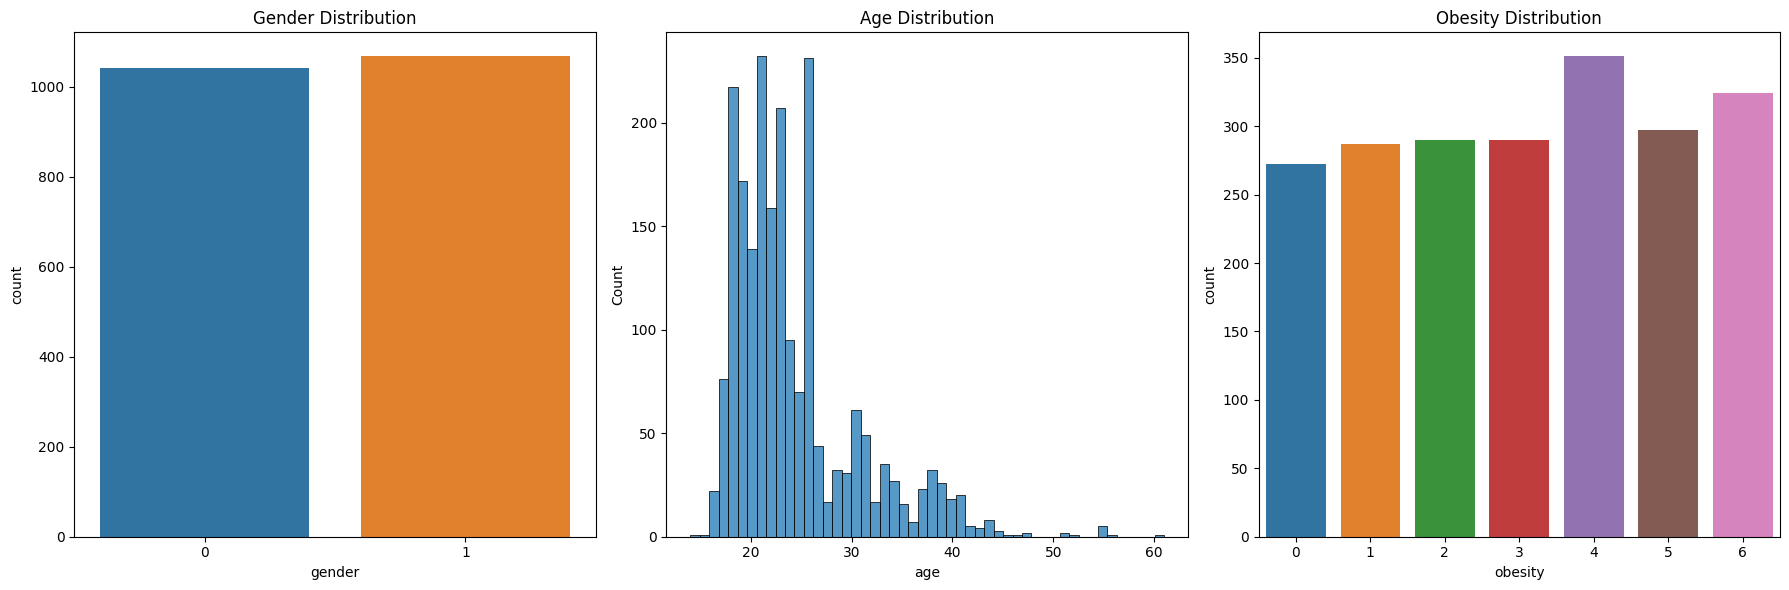

In [42]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define the columns to plot and their titles
columns_to_plot = ['gender', 'age', 'obesity']
titles = ['Gender Distribution', 'Age Distribution', 'Obesity Distribution']

for i, col in enumerate(columns_to_plot):
    if col == 'age':
        sns.histplot(df_cleaned[col], kde=False, ax=axes[i])
    else:
        sns.countplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [ ]:
### obesity is considered balance. In a large dataset, the count of each category is only
### expected to be close to be balanced

---

#### Part 2: ML model to predict obesity level
Choose and train an ML model to predict the obesity level, given all the other features.

5a. Use the dictionary you created in step 4e to print the different obesity level (original text strings).<br>
The ML model you choose will predict one of the levels, given all other features in the dataset.

In [43]:
print("Different obesity levels:")
for level, number in obesity_dict.items():
    print(f"{number}: {level}")

Different obesity levels:
0: Insufficient_Weight
1: Normal_Weight
2: Overweight_Level_I
3: Overweight_Level_II
4: Obesity_Type_I
5: Obesity_Type_II
6: Obesity_Type_III


5b. Create 3 Code cells to do the following 3 steps to train and test an appropriate ML model and show its accuracy.
- Code cell 1: __Create the X and y datasets__ and __print the shape of each set__.
- Code cell 2: __Create the train and test sets__, __choose an <u>appropriate</u> ML model__ from the ones we've discussed in class, and __train the model__.
- Code cell 3: __Test the model and show the accuracy__ of the model, using all the accuracy measurements that we discussed in class for the model.

If an accuracy measurement is a float, show the value with _2 digits after the decimal point_.<br>
And show the accuracy measurements with text explanation.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Split the data into features and labels
X = df_cleaned.drop('obesity', axis=1)
y = df_cleaned['obesity']

# Print the shape of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)





Shape of X (features): (2111, 16)
Shape of y (labels): (2111,)


In [45]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
### don't need

# Choose and train the ML model (e.g., Decision Tree Classifier)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the accuracy measurements
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(obesity_dict.keys())))

Model Evaluation Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        56
      Normal_Weight       0.90      0.85      0.88        62
 Overweight_Level_I       0.91      0.93      0.92        56
Overweight_Level_II       0.96      0.96      0.96        50
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.95      0.95      0.95        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



In [ ]:
### show confusion matrix   -1.5pts

5c. Using the <u>same</u> train and test data as the model above:
- __Choose all the other <u>appropriate</u> ML models that we've discussed__.<br>
- __Test and train each model, then show the same accuracy measurements__ as the model of step 5a.

You'll want at least one Code cell for each model that you choose.<br>
Put the name of each ML model that you work with in the Code cell.

In [47]:
from sklearn.linear_model import LogisticRegression

### this is not a regression problem   -2pts
### and logistic regression is not a model we've discussed in class   -1pt
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print the accuracy measurements
print("Logistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=list(obesity_dict.keys())))


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      1.00      0.93        56
      Normal_Weight       0.89      0.65      0.75        62
 Overweight_Level_I       0.73      0.79      0.76        56
Overweight_Level_II       0.81      0.86      0.83        50
     Obesity_Type_I       0.93      0.90      0.92        78
    Obesity_Type_II       0.89      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.87       423
       weighted avg       0.88      0.88      0.88       423



In [ ]:
### need to work with KNN model -1pt, GaussianNB  -1pt

5d. Conclusion:<br>
Which of the models that you've tested would you use to predict obesity level, given similar new data? Why?<br>
__Create a RawNB Convert cell for your answer__.

5e. Further analysis:
For one of the models, we discussed in class how to find the key features that the model relies on to make its prediction.<br>
- __Re-create this model and train it__
- Then __show the features and how much influence each feature has on the model__.

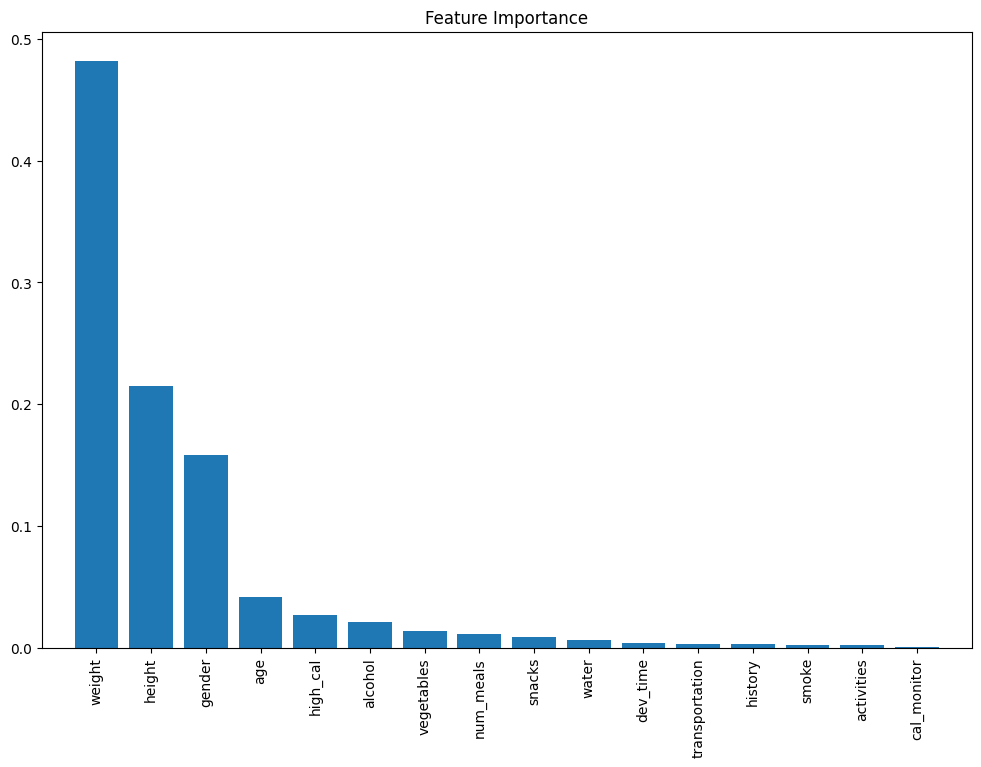

Feature importances:
weight: 0.48
height: 0.22
gender: 0.16
age: 0.04
high_cal: 0.03
alcohol: 0.02
vegetables: 0.01
num_meals: 0.01
snacks: 0.01
water: 0.01
dev_time: 0.00
transportation: 0.00
history: 0.00
smoke: 0.00
activities: 0.00
cal_monitor: 0.00


In [48]:
import numpy as np

# Split the data into features and labels
X = df_cleaned.drop('obesity', axis=1)
y = df_cleaned['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Show feature importance
feature_importances = model_dt.feature_importances_
features = df_cleaned.drop('obesity', axis=1).columns

# Plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print feature importances
print("Feature importances:")
for i in indices:
    print(f"{features[i]}: {feature_importances[i]:.2f}")

5f. __Find the top key feature__ from the output of step 5d,<br>
then __create a plot to showing the correlation between the top key feature and the obesity level__.

The plot axis label should show the obesity level as strings (just like in step 5a), and the strings should not overlap each other.

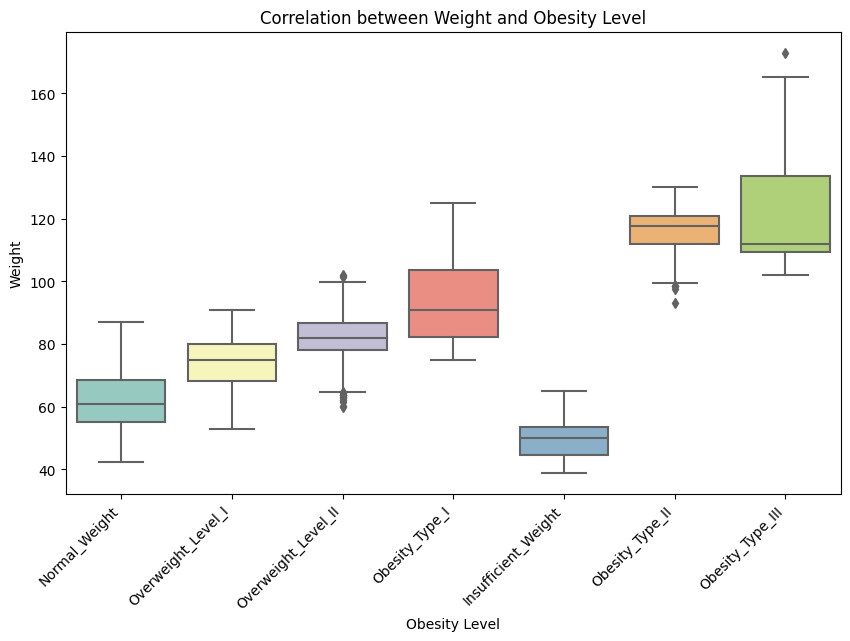

In [49]:
reverse_obesity_dict = {v: k for k, v in obesity_dict.items()}
df_cleaned['obesity_label'] = df_cleaned['obesity'].map(reverse_obesity_dict)

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesity_label', y='weight', data=df_cleaned, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Obesity Level")
plt.ylabel("Weight")
plt.title("Correlation between Weight and Obesity Level")
plt.show()

5g. Observing the output of step 5f, does it make sense that the model chose this particular feature as the top key feature?<br>
__Creat a RawNB Convert cell for your answer__.

---

#### Part 3: ML model to predict the height
Choose and train an ML model to predict the height of a person, given all the other features.

6a. __Show the first 5 rows of the DataFrame__ for reference.

In [50]:
display(df_cleaned.head())

,gender,age,height,weight,history,high_cal,vegetables,num_meals,snacks,smoke,water,cal_monitor,activities,dev_time,alcohol,transportation,obesity,obesity_label
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3,Overweight_Level_II


6b. __Plot the distribution of the height__<br>
The plot should have a title and labels as needed.<br>
Then __Create a Raw NBConvert cell to explain whether there is a good sample of heights__.

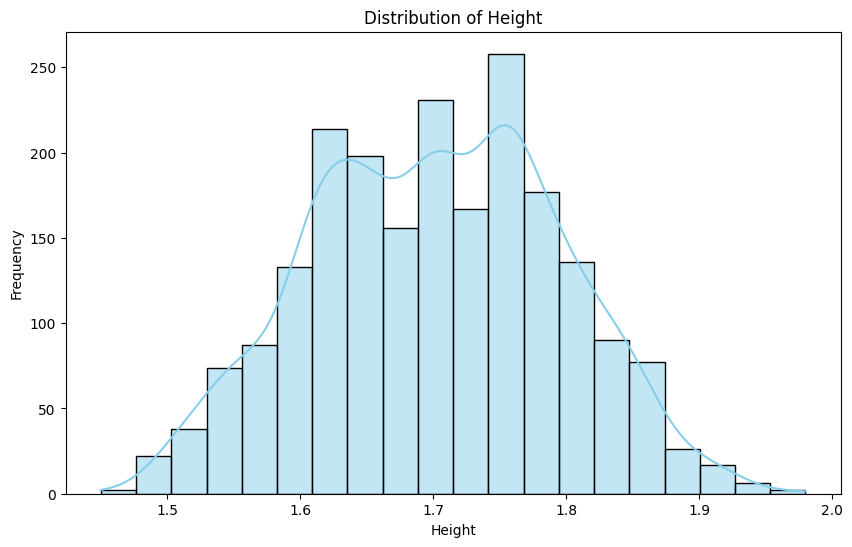

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['height'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
### and your conclusion for whether there's a good sample of heights?   -1/2pt

6c. Create 3 Code cells to do the following 3 steps to train and test an appropriate ML model and show its accuracy.
- Code cell 1: __Create the X and y datasets__ and __print the shape of each set__.
- Code cell 2: __Create the train and test sets__, __choose an <u>appropriate</u> ML model__ from the ones we've discussed in class, and __train the model__.
- Code cell 3: __Test the model and show the accuracy__ of the model, using all the accuracy measurements that we discussed in class for the model.

If an accuracy measurement is a float, show the value with _2 digits after the decimal point_.<br>
And show the accuracy measurements with text explanation.

In [52]:
X = df_cleaned.drop(['height', 'obesity', 'obesity_label'], axis=1)
### why drop obesity?    -1/2pt

y = df_cleaned['height']

# Print the shape of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

Shape of X (features): (2111, 15)
Shape of y (labels): (2111,)


In [53]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Linear Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R-squared (R2): 0.62


6d. Using the <u>same</u> train and test data as the model above:
- __Choose all the other <u>appropriate</u> ML models that we've discussed__.<br>
- __Test and train each model, then show the same accuracy measurements__ as the model of step 5a.

You'll want at least one Code cell for each model that you choose.<br>
Put the name of each ML model that you work with in the Code cell.

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Regressor Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


Random Forest Regressor Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2): 0.82


6e. Further analysis:
For one of the models, we discussed in class how to find the key features that the model relies on to make its prediction.<br>
- __Re-create this model and train it__
- Then __show the features and how much influence each feature has on the model__.

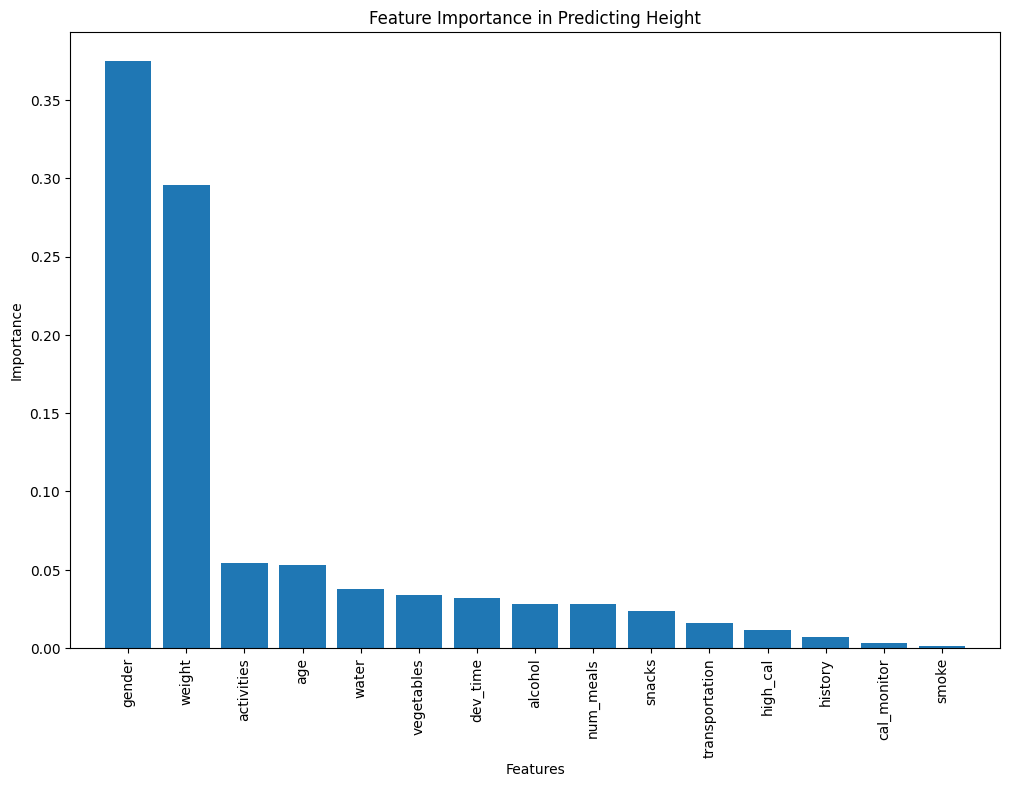

Feature importances:
gender: 0.37
weight: 0.30
activities: 0.05
age: 0.05
water: 0.04
vegetables: 0.03
dev_time: 0.03
alcohol: 0.03
num_meals: 0.03
snacks: 0.02
transportation: 0.02
high_cal: 0.01
history: 0.01
cal_monitor: 0.00
smoke: 0.00


In [56]:
# Prepare the dataset
X = df_cleaned.drop(['height', 'obesity', 'obesity_label'], axis=1)
y = df_cleaned['height']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Show feature importance
feature_importances = model_rf.feature_importances_
features = X.columns

# Plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Predicting Height")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Print feature importances
print("Feature importances:")
for i in indices:
    print(f"{features[i]}: {feature_importances[i]:.2f}")

6f. Conclusion: Which are the key features for this model?<br>
__Create a RawNB Convert cell for your answer__.

EC (1pt) Typically not all features in the dataset are important for the ML model, and removing the non-essential features is an important step in tuning the data for machine learning.<br>
Given the features and their values in step 6e, __remove as many non-essential features__ as you can but still keep the accuracy the same as when the model has all features.<br>
Then __train and test the model, and print the accuracy__.

In [57]:
# Essential features identified in step 6f
essential_features = ['gender', 'weight', 'activities', 'age', 'water']

# Create a new dataset with only the essential features
X_reduced = df_cleaned[essential_features]
y = df_cleaned['height']

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)

# Train the Random Forest Regressor model
model_rf_reduced = RandomForestRegressor(random_state=42)
model_rf_reduced.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_reduced = model_rf_reduced.predict(X_test_reduced)

# Evaluate the model
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = mean_squared_error(y_test, y_pred_reduced, squared=False)
r2_reduced = r2_score(y_test, y_pred_reduced)

# Print the evaluation metrics
print("Random Forest Regressor Model Evaluation Metrics with Essential Features:")
print(f"Mean Absolute Error (MAE): {mae_reduced:.2f}")
print(f"Mean Squared Error (MSE): {mse_reduced:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reduced:.2f}")
print(f"R-squared (R2): {r2_reduced:.2f}")

Random Forest Regressor Model Evaluation Metrics with Essential Features:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2): 0.79


In [ ]:
### +1 EC